In [1]:
# Import necessary modules
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit.library import CXGate
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import C4XGate
from qiskit_ibm_runtime.fake_provider import FakeSingapore

import time
import os
 
# service = QiskitRuntimeService(channel="ibm_quantum", token="71312790a9405e5c50790a7928a71fa4afb8271d5b1c54a1fc092fc3e9afe355ad29bd206edd926f3cc6f57bd59f7bc486c8fb372a3f5e3457b22d43f45ce1c0")
# # Set the API key as an environment variable

# # Initialize the Qiskit Runtime Service

# # Specify the backend
# backend_name = 'ibm_kyiv'
backend = FakeSingapore()

# Example quantum circuit
qreg_q = QuantumRegister(5, 'q')
cal_qc = QuantumCircuit(qreg_q)
from qiskit import QuantumCircuit
import numpy as np


# compiled_qft = transpile(qft_circuit, backend, seed_transpiler=42)


def qft_dagger(n):
    """Creates the inverse QFT on n qubits."""
    qc = QuantumCircuit(n)
    # Apply Hadamard gate to each qubit
    for qubit in range(n-1, -1, -1):
        qc.h(qubit)
        for j in range(qubit):
            qc.cp(-np.pi/2**(qubit-j), j, qubit)
    return qc
# linear_coupling_map = CouplingMap([(0, 1), (1, 2), (2, 3), (3, 4)])
n_qubits = 10
qft_circuit = qft_dagger(n_qubits)
qft_circuit.draw('mpl')

from qiskit.circuit.library import GroverOperator
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit = QuantumCircuit(n_qubits)
grover_circuit.h(range(n_qubits))  # Apply Hadamard
grover_circuit.append(grover, range(n_qubits))
grover_circuit.draw(output='mpl')
t_10 = CouplingMap([(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,18)])
# compiled_qft_new = transpile(qft_circuit, backend, seed_transpiler=42)
# Adding CX gates to the circuit
# cal_qc.cx(qreg_q[1], qreg_q[2])
# cal_qc.cx(qreg_q[1], qreg_q[4])
# cal_qc.cx(qreg_q[2], qreg_q[3])
# cal_qc.cx(qreg_q[5], qreg_q[4])
# cal_qc.cx(qreg_q[5], qreg_q[0])
# cal_qc.cx(qreg_q[6], qreg_q[0])
cal_qc.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
cal_qc.x(qreg_q[1])
cal_qc.x(qreg_q[2])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.x(qreg_q[0])
cal_qc.cx(qreg_q[0], qreg_q[4])

combo_cal_qc = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_cal_qc.append(cal_qc, combo_cal_qc.qubits[:5])

# Add the second circuit to the next 10 qubits
combo_cal_qc.append(grover_circuit, combo_cal_qc.qubits[5:])
# Transpile the circuit for the chosen backend
compiled_cal_qc_combo = transpile(combo_cal_qc, backend=backend, seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\1553571365.py:4: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\1553571365.py:20: DeprecationWarning: V1 fake backends are deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use V2 fake backends instead.
  backend = FakeSingapore()
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\1553571365.py:82: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  co

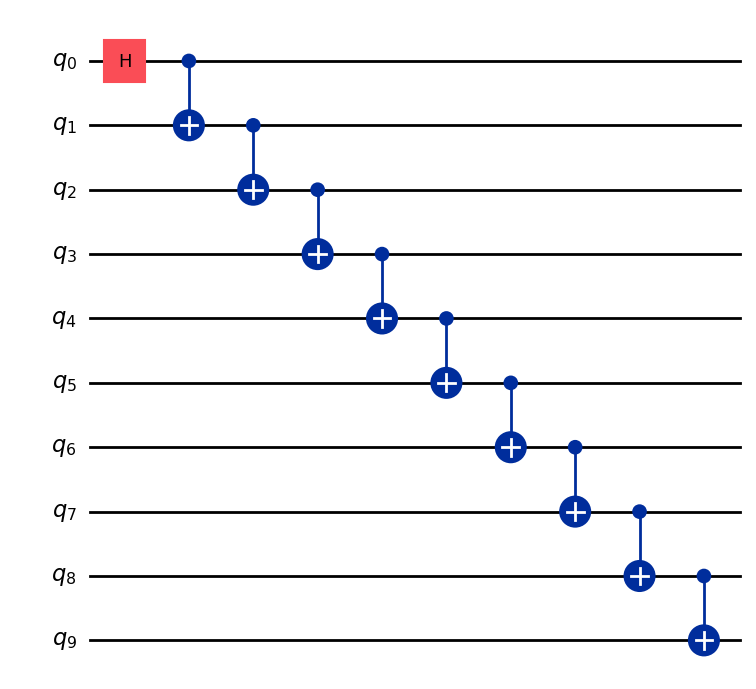

In [2]:
n_qubits = 10
ghz_circuit_new = QuantumCircuit(n_qubits)
ghz_circuit_new.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit_new.cx(qubit, qubit + 1) 

ghz_circuit_new.draw(output='mpl')

In [3]:
n_qubits = 5
qft_circuit_s = qft_dagger(n_qubits)
qft_circuit_s.draw('mpl')
t_10 = CouplingMap([(14,15),(15,18),(18,27),(27,26)])

combo_qft_circuit = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_qft_circuit.append(qft_circuit_s, combo_qft_circuit.qubits[:5])

# Add the second circuit to the next 10 qubits
combo_qft_circuit.append(grover_circuit, combo_qft_circuit.qubits[5:])
# Transpile the circuit for the chosen backend
combo_qft_circuit = transpile(combo_qft_circuit, backend=backend, seed_transpiler=42)
print(combo_qft_circuit)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\3701907330.py:14: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_qft_circuit = transpile(combo_qft_circuit, backend=backend, seed_transpiler=42)


global phase: 5π/4
                                                                              »
 ancilla_1 -> 0 ──────────────────────────────────────────────────────────────»
                ┌───────────┐                                                 »
       q_7 -> 1 ┤ U3(π,0,π) ├─────────────────────────────────────────────────»
                └───────────┘                                                 »
 ancilla_0 -> 2 ──────────────────────────────────────────────────────────────»
                 ┌─────────┐                      ┌─────────┐                 »
       q_5 -> 3 ─┤ U2(0,π) ├───────────■──────────┤ U2(0,0) ├─────────────────»
                 └─────────┘           │          └─────────┘                 »
 ancilla_2 -> 4 ───────────────────────┼──────────────────────────────────────»
                ┌───────────┐┌───┐     │          ┌──────────┐                »
      q_14 -> 5 ┤ U2(-π,-π) ├┤ X ├─────┼──────────┤ U1(-π/4) ├────────────────»
                ├────

In [4]:
mod5_4 = QuantumCircuit(qreg_q)
t_coupling_map = CouplingMap([(11, 17), (10,11), (11, 12),(23,17)])

mod5_4.cx(qreg_q[0], qreg_q[2])
mod5_4.cx(qreg_q[1], qreg_q[3])
mod5_4.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
mod5_4.cx(qreg_q[2], qreg_q[3])
mod5_4.cx(qreg_q[3], qreg_q[4])
combo_mod5_4 = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_mod5_4.append(mod5_4, combo_mod5_4.qubits[2:7])

# Add the second circuit to the next 10 qubits
combo_mod5_4.append(qft_circuit, [combo_mod5_4.qubits[i] for i in [0,1,7,8,9,10,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_mod5_4 = transpile(combo_mod5_4, backend=backend, seed_transpiler=42)

# Compile the original circuit
# compiled_mod5_4 = transpile(mod5_4, backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2986661634.py:17: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_mod5_4 = transpile(combo_mod5_4, backend=backend, seed_transpiler=42)


In [5]:
from qiskit.circuit.library import GroverOperator

n_qubits = 5
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit_s = QuantumCircuit(n_qubits)
grover_circuit_s.h(range(n_qubits))  # Apply Hadamard
grover_circuit_s.append(grover, range(n_qubits))  # Apply Grover iteration

grover_circuit_s.draw('mpl')
grover_cm = CouplingMap([(8,7),(16,7),(19,16),(20,19)])

combo_grover_circuit = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_grover_circuit.append(grover_circuit_s, combo_grover_circuit.qubits[3:8])

# Add the second circuit to the next 10 qubits
combo_grover_circuit.append(ghz_circuit_new, [combo_grover_circuit.qubits[i] for i in [0,1,2,8,9,10,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_grover_circuit = transpile(combo_grover_circuit, backend=backend, seed_transpiler=42)
# compiled_grover = transpile(grover, backend=backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\4113623795.py:23: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_grover_circuit = transpile(combo_grover_circuit, backend=backend, seed_transpiler=42)


In [6]:
n_qubits = 5
ghz_circuit = QuantumCircuit(n_qubits)
ghz_circuit.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit.cx(qubit, qubit + 1)  # Create entanglement

# ghz_circuit.measure_all()

ghz_circuit.draw('mpl')

ghz_cm= CouplingMap([(17,23),(23,24),(24,25),(25,26)])

combo_ghz_circuit = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_ghz_circuit.append(ghz_circuit, combo_ghz_circuit.qubits[4:9])

# Add the second circuit to the next 10 qubits
combo_ghz_circuit.append(grover_circuit, [combo_ghz_circuit.qubits[i] for i in [0,1,2,3,9,10,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_ghz_circuit = transpile(combo_ghz_circuit, backend=backend, seed_transpiler=42)
# compiled_ghz = transpile(ghz_circuit, backend=backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2975196529.py:21: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_ghz_circuit = transpile(combo_ghz_circuit, backend=backend, seed_transpiler=42)


In [7]:
qreg_q = QuantumRegister(5, 'q')
one23 = QuantumCircuit(qreg_q)

one23.cx(qreg_q[3], qreg_q[1])
one23.cx(qreg_q[2], qreg_q[0])
one23.ccx(qreg_q[3], qreg_q[4], qreg_q[2])
one23.ccx(qreg_q[2], qreg_q[0], qreg_q[4])
one23.cx(qreg_q[4], qreg_q[3])
one23.ccx(qreg_q[1], qreg_q[3], qreg_q[4])
one23.cx(qreg_q[3], qreg_q[2])
one23.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
one23_cm= CouplingMap([(13,14),(14,15),(15,18),(18,27)])
combo_one23 = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_one23.append(one23, combo_one23.qubits[5:10])

# Add the second circuit to the next 10 qubits
combo_one23.append(grover_circuit, [combo_one23.qubits[i] for i in [0,1,2,3,4,10,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_one23 = transpile(combo_one23, backend=backend, seed_transpiler=42)
# compiled_one23 = transpile(one23, backend=backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2821052599.py:21: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_one23 = transpile(combo_one23, backend=backend, seed_transpiler=42)


In [8]:
qreg_q = QuantumRegister(5, 'q')
fourgt4 = QuantumCircuit(qreg_q)
#backend = Aer.get_backend('qasm_simulator')
from qiskit.circuit.library import C3XGate, C4XGate

fourgt4.cx(qreg_q[4], qreg_q[1])
fourgt4.ccx(qreg_q[2], qreg_q[4], qreg_q[0])
fourgt4.x(qreg_q[0])

fourgt4.cx(qreg_q[1],qreg_q[2])
fourgt4.x(qreg_q[0])

fourgt4.append(C3XGate(), [qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])

fourgt4.x(qreg_q[0])
fourgt4.cx(qreg_q[1],qreg_q[2])

fourgt4.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
fourgt4.append(C4XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])
fourgt4_cm= CouplingMap([(4,6),(6,13),(12,13),(14,13)])

combo_4gt4 = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_4gt4.append(fourgt4, combo_4gt4.qubits[6:11])

# Add the second circuit to the next 10 qubits
combo_4gt4.append(ghz_circuit_new, [combo_4gt4.qubits[i] for i in [0,1,2,3,4,5,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_4gt4 = transpile(combo_4gt4, backend=backend, seed_transpiler=42)
# compiled_4gt4=transpile(fourgt4, backend=backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\503542360.py:30: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_4gt4 = transpile(combo_4gt4, backend=backend, seed_transpiler=42)


In [9]:
qreg_q = QuantumRegister(5, 'q')
fourmod7 = QuantumCircuit(qreg_q)

fourmod7.x(qreg_q[0])
fourmod7.ccx(qreg_q[4], qreg_q[1], qreg_q[0])
fourmod7.cx(qreg_q[1], qreg_q[4])
fourmod7.cx(qreg_q[1], qreg_q[4])
fourmod7.append(C3XGate(), [qreg_q[3], qreg_q[4], qreg_q[2], qreg_q[0]])
fourmod7.append(C3XGate(), [qreg_q[3], qreg_q[0], qreg_q[2], qreg_q[4]])
fourmod7.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
fourmod7_cm= CouplingMap([(0,5),(5,9),(8,9),(9,10)])
combo_4mod7 = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_4mod7.append(fourmod7, combo_4mod7.qubits[7:12])

# Add the second circuit to the next 10 qubits
combo_4mod7.append(grover_circuit, [combo_4mod7.qubits[i] for i in [0,1,2,3,4,5,6,12,13,14]])
# Transpile the circuit for the chosen backend
combo_4mod7 = transpile(combo_4mod7, backend=backend, seed_transpiler=42)
# compiled_4mod7=transpile(fourmod7, backend=backend, seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\486071133.py:20: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_4mod7 = transpile(combo_4mod7, backend=backend, seed_transpiler=42)


In [10]:
fourgt11 = QuantumCircuit(qreg_q)

fourgt11.cx(qreg_q[2], qreg_q[1])
fourgt11.cx(qreg_q[1], qreg_q[2])
fourgt11.cx(qreg_q[3], qreg_q[2])
fourgt11.cx(qreg_q[2], qreg_q[3])
fourgt11.cx(qreg_q[4], qreg_q[3])
fourgt11.cx(qreg_q[3], qreg_q[4])
fourgt11.ccx(qreg_q[1], qreg_q[4], qreg_q[0])
fourgt11.cx(qreg_q[4], qreg_q[3])
fourgt11.cx(qreg_q[4], qreg_q[2])
fourgt11.cx(qreg_q[4], qreg_q[1])
fourgt11.cx(qreg_q[0], qreg_q[4])
fourgt11.cx(qreg_q[4], qreg_q[0])
combo_4gt11 = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_4gt11.append(fourgt11, combo_4gt11.qubits[8:13])

# Add the second circuit to the next 10 qubits
combo_4gt11.append(grover_circuit, [combo_4gt11.qubits[i] for i in [0,1,2,3,4,5,6,7,13,14]])
# Transpile the circuit for the chosen backend
combo_4gt11 = transpile(combo_4gt11, backend=backend, seed_transpiler=42)
# compiled_4gt11=transpile(fourmod7, backend=backend,seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\141398134.py:23: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_4gt11 = transpile(combo_4gt11, backend=backend, seed_transpiler=42)


In [11]:
mod5mils = QuantumCircuit(qreg_q)

mod5mils.x(qreg_q[3])
mod5mils.cx(qreg_q[1], qreg_q[3])
mod5mils.ccx(qreg_q[3], qreg_q[2], qreg_q[4])
mod5mils.ccx(qreg_q[3], qreg_q[0], qreg_q[4])
mod5mils.cx(qreg_q[3], qreg_q[4])
mod5mils_cm=CouplingMap([(21,22),(17,23),(23,22),(20,21)])
combo_mod5mils = QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_mod5mils.append(mod5mils, combo_mod5mils.qubits[9:14])

# Add the second circuit to the next 10 qubits
combo_mod5mils.append(ghz_circuit_new, [combo_mod5mils.qubits[i] for i in [0,1,2,3,4,5,6,7,8,14]])
# Transpile the circuit for the chosen backend
combo_mod5mils = transpile(combo_mod5mils, backend=backend, seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\587202482.py:17: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_mod5mils = transpile(combo_mod5mils, backend=backend, seed_transpiler=42)


In [12]:
fourgt12 = QuantumCircuit(qreg_q)

fourgt12.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
fourgt12.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
fourgt12.cx(qreg_q[4], qreg_q[0])
fourgt12.cx(qreg_q[0], qreg_q[4])
fourgt12.append(C4XGate(), [qreg_q[3], qreg_q[2], qreg_q[0], qreg_q[1], qreg_q[4]])
fourgt12_cm=CouplingMap([(15,18),(18,27),(27,26),(26,25)])
combo_4gt12= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_4gt12.append(fourgt12, combo_4gt12.qubits[:5])

# Add the second circuit to the next 10 qubits
combo_4gt12.append(qft_circuit, combo_4gt12.qubits[5:])
# Transpile the circuit for the chosen backend
combo_4gt12= transpile(combo_4gt12, backend=backend, seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\1369135283.py:17: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_4gt12= transpile(combo_4gt12, backend=backend, seed_transpiler=42)


In [13]:
fourgt13 = QuantumCircuit(qreg_q)

fourgt13.cx(qreg_q[4], qreg_q[0])
fourgt13.append(C3XGate(), [qreg_q[3], qreg_q[2], qreg_q[1], qreg_q[0]])
fourgt13.cx(qreg_q[0], qreg_q[4])
fourgt13.draw(output='mpl')
fourgt13_cm=CouplingMap([(0,5),(5,9),(9,10),(10,11)])
combo_4gt13= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_4gt13.append(fourgt13, combo_4gt13.qubits[10:])

# Add the second circuit to the next 10 qubits
combo_4gt13.append(grover_circuit, combo_4gt13.qubits[:10])
# Transpile the circuit for the chosen backend
combo_4gt13= transpile(combo_4gt13, backend=backend, seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\219014366.py:16: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_4gt13= transpile(combo_4gt13, backend=backend, seed_transpiler=42)


In [14]:
from qiskit.circuit.random import random_circuit

# Generate a random 10-qubit quantum circuit with 20 layers of gates
random_circ = random_circuit(num_qubits=5, depth=3, max_operands=2)
combo_rc_s= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s.append(grover_circuit, combo_rc_s.qubits[1:11])

# Add the second circuit to the next 10 qubits
combo_rc_s.append(random_circ, [combo_rc_s.qubits[i] for i in [0,11,12,13,14]])
# Transpile the circuit for the chosen backend
combo_rc_s= transpile(combo_rc_s, backend=backend, seed_transpiler=42)

combo_rc_s_2= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s_2.append(qft_circuit, combo_rc_s_2.qubits[2:12])

# Add the second circuit to the next 10 qubits
combo_rc_s_2.append(random_circ, [combo_rc_s_2.qubits[i] for i in [0,1,12,13,14]])

combo_rc_s_2= transpile(combo_rc_s_2, backend=backend, seed_transpiler=40)

combo_rc_s_3= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s_3.append(grover_circuit, combo_rc_s_3.qubits[3:13])

# Add the second circuit to the next 10 qubits
combo_rc_s_3.append(random_circ, [combo_rc_s_3.qubits[i] for i in [0,1,2,13,14]])
combo_rc_s_3= transpile(combo_rc_s_3, backend=backend, seed_transpiler=47)

combo_rc_s_4= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s_4.append(grover_circuit, combo_rc_s_4.qubits[3:13])

# Add the second circuit to the next 10 qubits
combo_rc_s_4.append(random_circ, [combo_rc_s_4.qubits[i] for i in [0,1,2,13,14]])
combo_rc_s_4= transpile(combo_rc_s_4, backend=backend, seed_transpiler=48)

combo_rc_s_5= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s_5.append(ghz_circuit_new, combo_rc_s_5.qubits[3:13])

# Add the second circuit to the next 10 qubits
combo_rc_s_5.append(random_circ, [combo_rc_s_5.qubits[i] for i in [0,1,2,13,14]])
combo_rc_s_5= transpile(combo_rc_s_5, backend=backend, seed_transpiler=49)

combo_rc_s_6= QuantumCircuit(15)

# Add the first circuit to the first 5 qubits
combo_rc_s_6.append(grover_circuit, combo_rc_s_6.qubits[3:13])

# Add the second circuit to the next 10 qubits
combo_rc_s_6.append(random_circ, [combo_rc_s_6.qubits[i] for i in [0,1,2,13,14]])
combo_rc_s_6= transpile(combo_rc_s_6, backend=backend, seed_transpiler=47)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2974811132.py:13: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_rc_s= transpile(combo_rc_s, backend=backend, seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2974811132.py:23: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  combo_rc_s_2= transpile(combo_rc_s_2, backend=backend, seed_transpiler=40)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\2974811132.py:32: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in th

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\3093413941.py:5: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_singapore ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_cal_qc_t = transpile(cal_qc, backend=backend, seed_transpiler=42)


{(17, 18), (18, 19), (13, 18)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\3093413941.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\3093413941.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if len(instruction[1]) == 2:
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_15856\3093413941.py:79: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [qarg for qarg in instruction[1]]


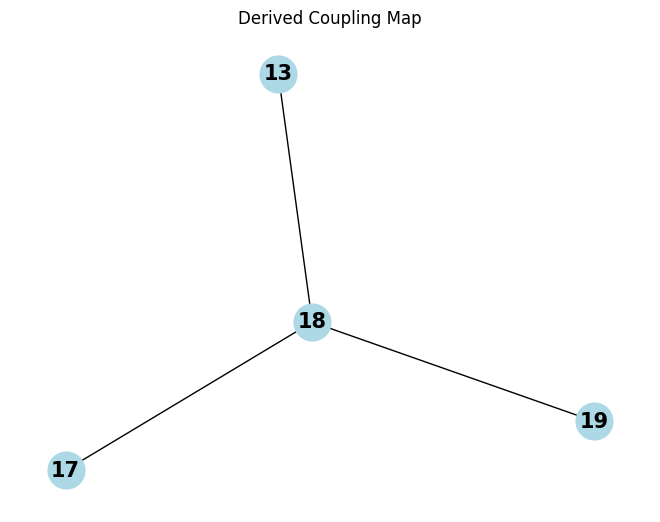

[(6, 8), (11, 7), (5, 3), (10, 9), (12, 6), (8, 12), (7, 1), (13, 11), (14, 5), (9, 10), (4, 17), (0, 18), (1, 16), (2, 19), (3, 15)]


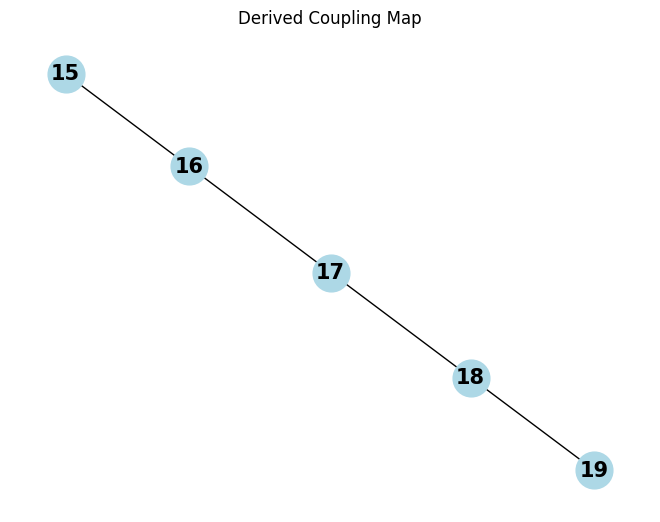

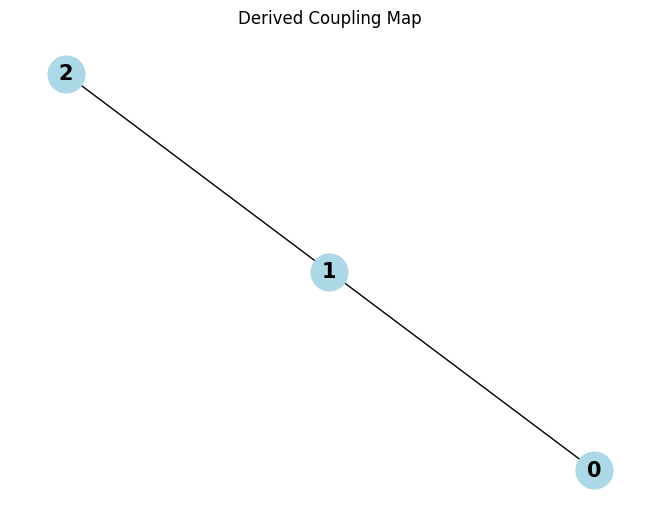

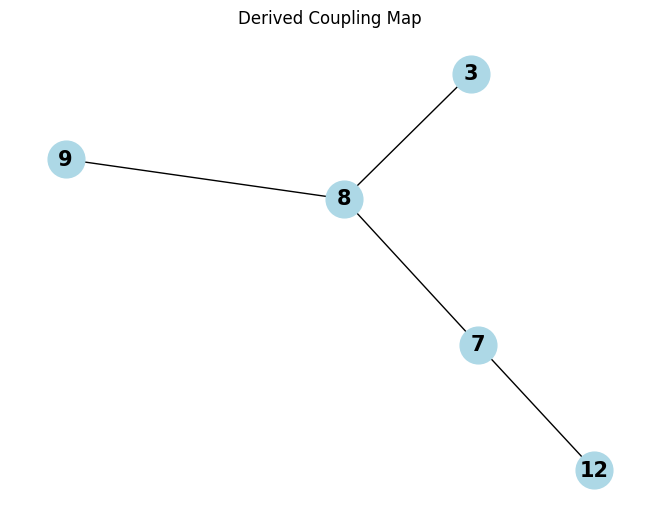

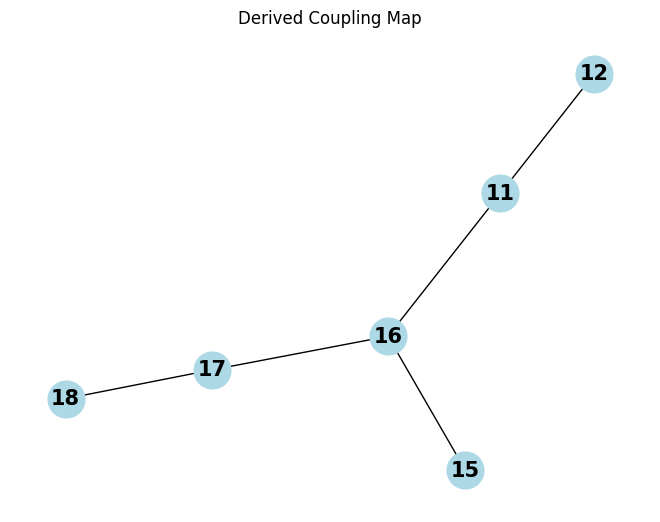

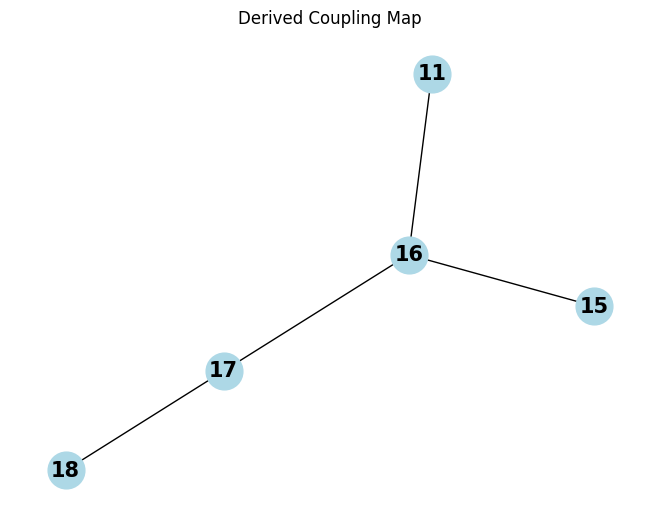

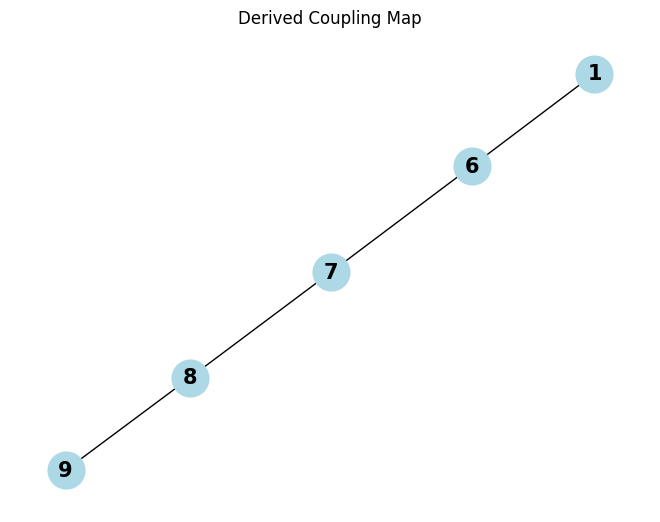

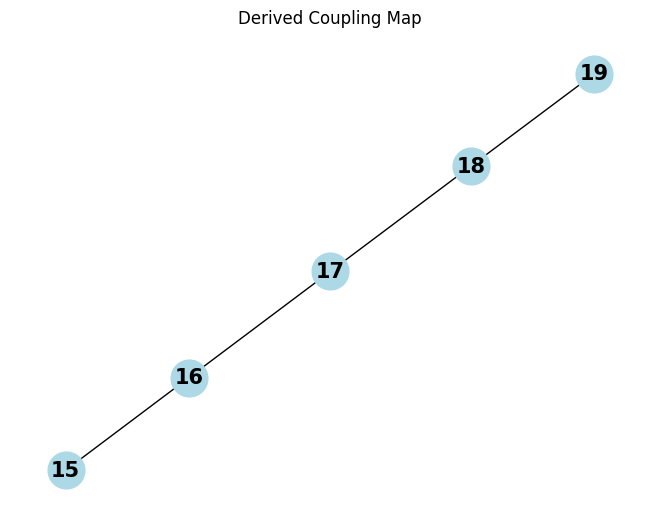

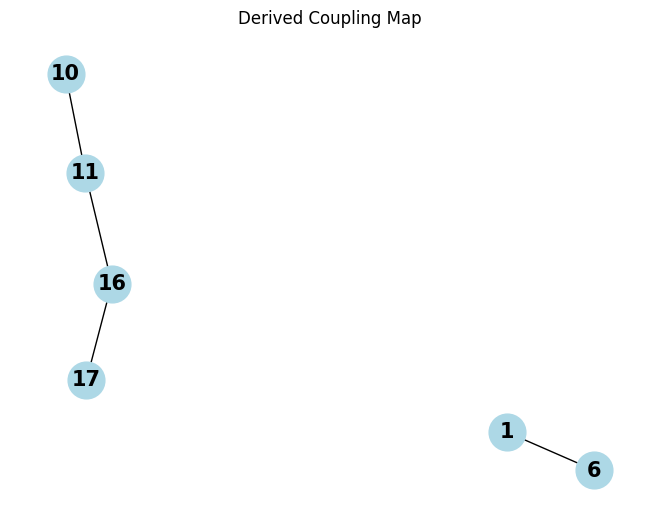

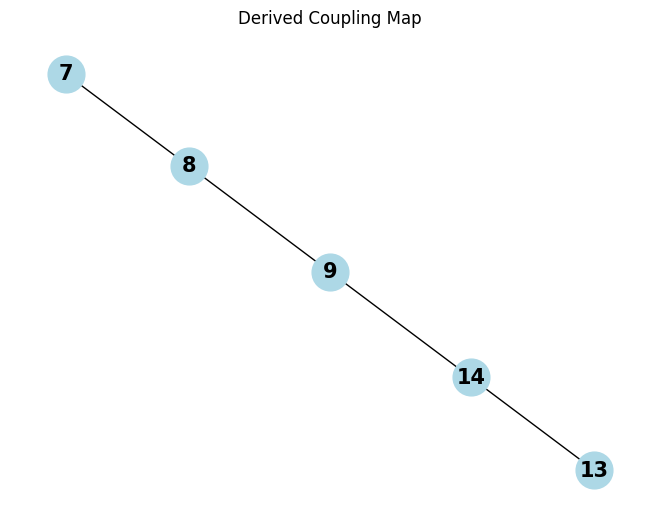

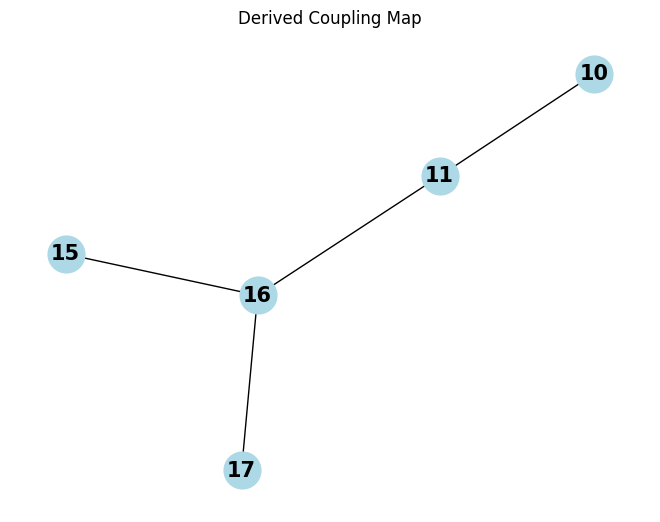

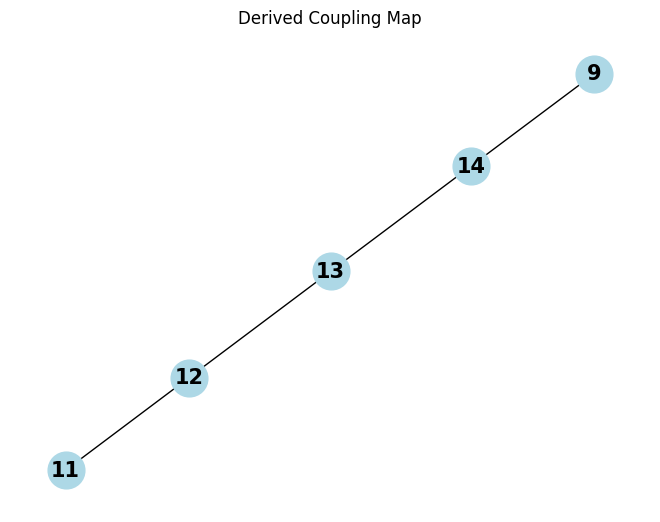

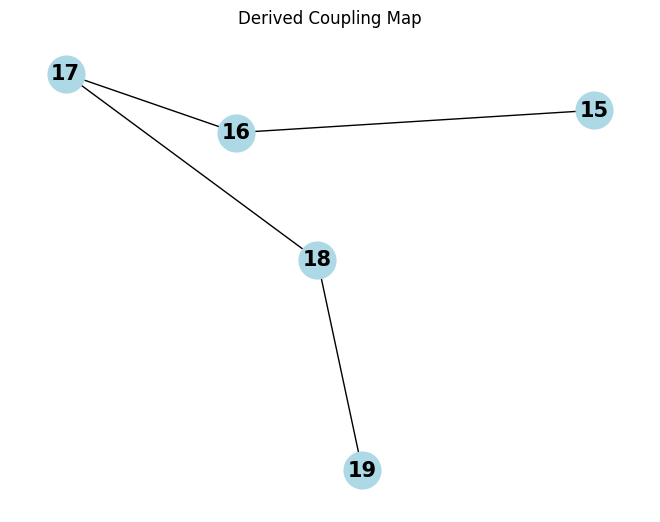

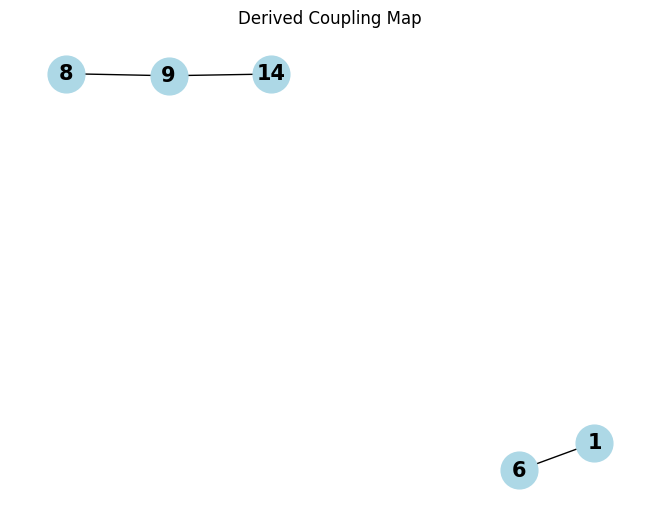

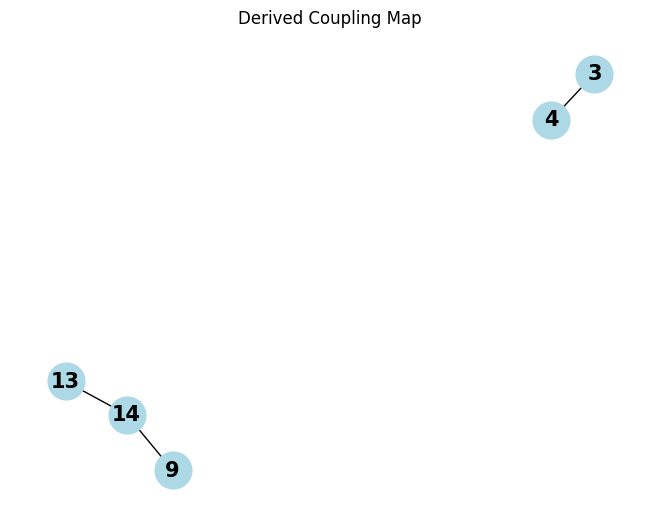

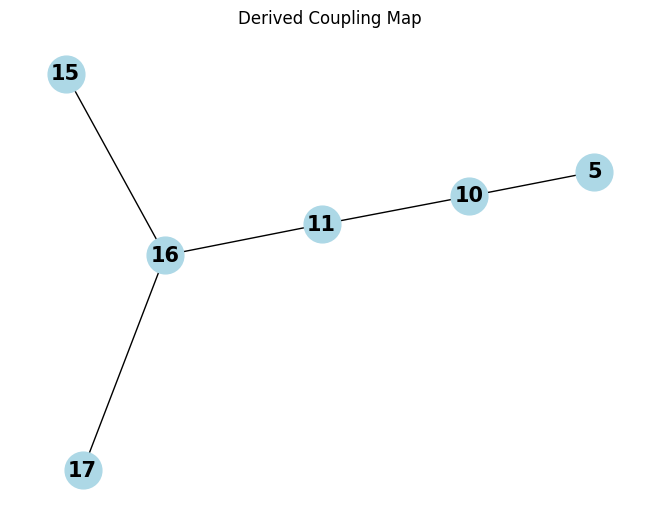

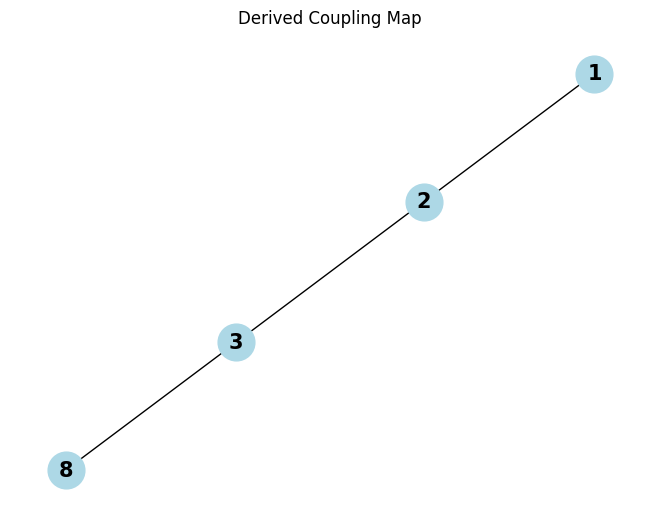

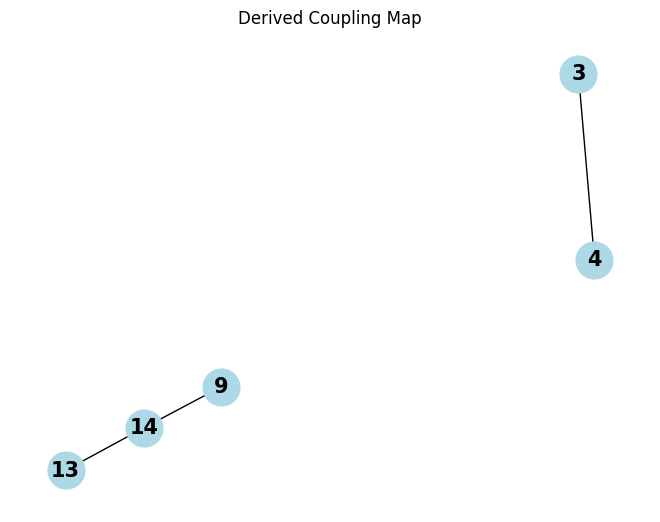

In [ ]:
from collections import Counter
import numpy as np
from qiskit.circuit.library import SwapGate, CXGate, RZZGate, RXXGate, RYYGate, iSwapGate
from qiskit.quantum_info import Operator
compiled_cal_qc_t = transpile(cal_qc, backend=backend, seed_transpiler=42)
def is_swap_gate(instruction_tuple):
    """Check if the given instruction represents a SWAP gate or equivalent sequence."""
    instruction = instruction_tuple[0]  # Unpack the instruction from the tuple

    # Direct SWAP gate
    if isinstance(instruction, SwapGate):
        return True
    
    # Named SWAP gate
    if instruction.name.lower() == 'swap':
        return True
    
    # Check for equivalent operations using matrix comparison
    if instruction.num_qubits == 2:
        swap_op = Operator(SwapGate())
        instr_op = Operator(instruction)
        if np.allclose(instr_op.data, swap_op.data, atol=1e-10):
            return True
    
    # Check for common SWAP implementations
    if isinstance(instruction, CXGate):
        # CNOT-based SWAP (3 CNOTs)
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 3:
                cx1, cx2, cx3 = data[0][0], data[1][0], data[2][0]
                if (isinstance(cx1, CXGate) and isinstance(cx2, CXGate) and isinstance(cx3, CXGate) and
                    cx1.qargs[0] == cx2.qargs[1] and cx1.qargs[1] == cx3.qargs[1] and
                    cx2.qargs[0] == cx3.qargs[0]):
                    return True
    
    # iSWAP-based SWAP
    if isinstance(instruction, iSwapGate):
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 2:
                iswap, s = data[0][0], data[1][0]
                if isinstance(iswap, iSwapGate) and s.name == 's' and s.qargs == iswap.qargs:
                    return True
    
    # RZZ, RXX, RYY-based SWAP
    if isinstance(instruction, (RZZGate, RXXGate, RYYGate)):
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 3:
                rzz, rxx, ryy = data[0][0], data[1][0], data[2][0]
                if (isinstance(rzz, RZZGate) and isinstance(rxx, RXXGate) and isinstance(ryy, RYYGate) and
                    rzz.params[0] == rxx.params[0] == ryy.params[0] == np.pi/2 and
                    rzz.qargs == rxx.qargs == ryy.qargs):
                    return True
    
    return False

from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import SwapGate
# Updated function to derive coupling map
# Updated function to derive coupling map
# Updated function to derive coupling map
def derive_coupling_map_from_circuit(transpiled_circuit):
    derived_coupling_map = set()  # Use a set to avoid duplicate entries

    # Initialize the swap history for each qubit in the circuit
    qubit_swap_history = {qubit: False for qubit in transpiled_circuit.qubits}

    for instruction in transpiled_circuit.data:
        if instruction[0].name == 'swap':
            # If the instruction is a SWAP gate, mark the qubits as involved in a swap
            for qarg in instruction[1]:
                qubit_swap_history[qarg] = True
            continue  # Move to the next instruction

        if len(instruction[1]) == 2:
            # Directly use the qubit objects
            qubits = [qarg for qarg in instruction[1]]

            # Check if any of the qubits were involved in a SWAP
            if not all(qubit_swap_history[qubit] for qubit in qubits):
                # If neither qubit has been swapped, add the connection
                qubit_indices = [transpiled_circuit.find_bit(qarg).index for qarg in qubits]
                derived_coupling_map.add(tuple(sorted(qubit_indices)))

    return derived_coupling_map

def get_logical_to_physical_mapping(transpiled_circuit):
    """Retrieve the logical-to-physical qubit mapping from a transpiled circuit."""
    layout = transpiled_circuit._layout

    logical_to_physical = {}
    if layout is not None and layout.initial_layout is not None:
        for logical_qubit, physical_qubit in layout.initial_layout.get_virtual_bits().items():
            logical_to_physical[logical_qubit] = physical_qubit  # Directly use the integer value of physical_qubit

    return logical_to_physical

def mapping_to_edges(mapping):
    """Convert the logical-to-physical qubit mapping dictionary to a list of edges."""
    edges = []
    
    for logical_qubit, physical_qubit in mapping.items():
        # Get the index of the logical qubit from its quantum register
        # Since the Qubit object does not have a 'register' attribute, we use the Qubit object itself
        # to find its position in the original register using its reference.
        if 'ancilla' in logical_qubit._register.name:
            continue
        logical_register = logical_qubit._register
        logical_index = list(logical_register).index(logical_qubit)   # Qubit is (register, index), so access the second part
        
        edges.append((logical_index, physical_qubit))  # Add as a (logical, physical) pair
    
    return edges

def filter_physical_edges(logical_physical_connections, physical_coupling_map, exclude_logical_indices):
    """Filter out edges in the physical coupling map that are connected to specific logical qubits."""
    
    # Identify the physical qubits connected to the specified logical qubits
    exclude_physical_qubits = {physical for logical, physical in logical_physical_connections if logical in exclude_logical_indices}
    
    # Filter the physical coupling map to remove edges that contain any of the excluded physical qubits
    filtered_physical_coupling_map = {edge for edge in physical_coupling_map if not (edge[0] in exclude_physical_qubits or edge[1] in exclude_physical_qubits)}
    
    return filtered_physical_coupling_map

exclude_logical_indices = {5,6,7,8,9, 10,11,12,13,14}


# Use the updated function to derive the coupling map
import matplotlib.pyplot as plt
import networkx as nx

def plot_coupling_map(coupling_map):
    # Create a graph from the coupling map
    G = nx.Graph()
    G.add_edges_from(coupling_map)
    
    # Draw the graph using networkx
    pos = nx.spring_layout(G)  # Position nodes using a layout algorithm
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=15, font_weight='bold')
    plt.title("Derived Coupling Map")
    plt.show()

# Assuming derived_map is the derived coupling map from your code

# # Plot the derived coupling map
# start_time = time.time()
# derived_map_mod5= derive_coupling_map_from_circuit(compiled_mod5_4)
# print(derived_map_mod5)
# plot_coupling_map(derived_map_mod5)
# end_time = time.time()
# execution_time = end_time- start_time
# print(execution_time)

start_time = time.time()
derived_map_1bit_adder = derive_coupling_map_from_circuit(compiled_cal_qc_combo)
# print(derived_map_1bit_adder)
logical_to_physical = get_logical_to_physical_mapping(compiled_cal_qc_combo)
edges_list = mapping_to_edges(logical_to_physical)
# print(edges_list)
exclude_logical_indices={5,6,7,8,9,10,11,12,13,14}

filtered_edges_1bit = filter_physical_edges(edges_list, derived_map_1bit_adder, exclude_logical_indices)
# print(filtered_edges_1bit)
print(filtered_edges_1bit)
plot_coupling_map(filtered_edges_1bit)

derived_map_qft = derive_coupling_map_from_circuit(combo_qft_circuit)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_circuit)
edges_list = mapping_to_edges(logical_to_physical)
# exclude_logical_indices={0,6,7,8,9,10,11,12,13,14}
print(edges_list)
filtered_edges_qft = filter_physical_edges(edges_list, derived_map_qft, exclude_logical_indices)
plot_coupling_map(filtered_edges_qft)

derived_map_mod54 = derive_coupling_map_from_circuit(combo_mod5_4)
logical_to_physical = get_logical_to_physical_mapping(combo_mod5_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,7,8,9,10,11,12,13,14}
filtered_edges_mod54 = filter_physical_edges(edges_list,derived_map_mod54, exclude_logical_indices)
plot_coupling_map(filtered_edges_mod54)

derived_map_grover = derive_coupling_map_from_circuit(combo_grover_circuit)

logical_to_physical = get_logical_to_physical_mapping(combo_grover_circuit)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,8,9,10,11,12,13,14}
filtered_edges_grover = filter_physical_edges(edges_list,derived_map_grover, exclude_logical_indices)
plot_coupling_map(filtered_edges_grover)

derived_map_ghz = derive_coupling_map_from_circuit(combo_ghz_circuit)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,9,10,11,12,13,14}
filtered_edges_ghz = filter_physical_edges(edges_list, derived_map_ghz,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz)

derived_map_one23 = derive_coupling_map_from_circuit(combo_one23)
logical_to_physical = get_logical_to_physical_mapping(combo_one23)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,10,11,12,13,14}
filtered_edges_one23 = filter_physical_edges(edges_list,derived_map_one23, exclude_logical_indices)
plot_coupling_map(filtered_edges_one23)


derived_map_4gt4 = derive_coupling_map_from_circuit(combo_4gt4)
logical_to_physical = get_logical_to_physical_mapping(combo_4gt4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,11,12,13,14}
filtered_edges_4gt4 = filter_physical_edges(edges_list,derived_map_4gt4, exclude_logical_indices)
plot_coupling_map(filtered_edges_4gt4)

derived_map_4mod7 = derive_coupling_map_from_circuit(combo_4mod7)
logical_to_physical = get_logical_to_physical_mapping(combo_4mod7)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,12,13,14}
filtered_edges_4mod7 = filter_physical_edges(edges_list, derived_map_4mod7,exclude_logical_indices)
plot_coupling_map(filtered_edges_4mod7)

derived_map_4gt11 = derive_coupling_map_from_circuit(combo_4gt11)
logical_to_physical = get_logical_to_physical_mapping(combo_4gt11)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,13,14}
filtered_edges_4gt11 = filter_physical_edges(edges_list, derived_map_4gt11,exclude_logical_indices)
plot_coupling_map(filtered_edges_4gt11)

derived_map_mod5mils = derive_coupling_map_from_circuit(combo_mod5mils)
logical_to_physical = get_logical_to_physical_mapping(combo_mod5mils)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,8,14}
filtered_edges_mod5mils = filter_physical_edges(edges_list, derived_map_mod5mils,exclude_logical_indices)
plot_coupling_map(filtered_edges_mod5mils)

derived_map_4gt12 = derive_coupling_map_from_circuit(combo_4gt12)
logical_to_physical = get_logical_to_physical_mapping(combo_4gt12)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={5,6,7,8,9,10,11,12,13,14}
filtered_edges_4gt12 = filter_physical_edges(edges_list, derived_map_4gt12,exclude_logical_indices)
plot_coupling_map(filtered_edges_4gt12)

derived_map_4gt13 = derive_coupling_map_from_circuit(combo_4gt13)
logical_to_physical = get_logical_to_physical_mapping(combo_4gt13)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,8,9}
filtered_edges_4gt13 = filter_physical_edges(edges_list, derived_map_4gt13,exclude_logical_indices)
plot_coupling_map(filtered_edges_4gt13)

derived_map_rc_s= derive_coupling_map_from_circuit(combo_rc_s)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5,6,7,8,9,10}
filtered_edges_rc_s = filter_physical_edges(edges_list, derived_map_rc_s,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s)

derived_map_rc_s_2= derive_coupling_map_from_circuit(combo_rc_s_2)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s_2)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={2,3,4,5,6,7,8,9,10,11}
filtered_edges_rc_s_2 = filter_physical_edges(edges_list, derived_map_rc_s_2,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s_2)

derived_map_rc_s_3= derive_coupling_map_from_circuit(combo_rc_s_3)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s_3)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={3,4,5,6,7,8,9,10,11,12}
filtered_edges_rc_s_3 = filter_physical_edges(edges_list, derived_map_rc_s_3,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s_3)

derived_map_rc_s_4= derive_coupling_map_from_circuit(combo_rc_s_4)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={3,4,5,6,7,8,9,10,11,12}
filtered_edges_rc_s_4 = filter_physical_edges(edges_list, derived_map_rc_s_4,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s_4)

derived_map_rc_s_5= derive_coupling_map_from_circuit(combo_rc_s_5)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s_5)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={3,4,5,6,7,8,9,10,11,12}
filtered_edges_rc_s_5 = filter_physical_edges(edges_list, derived_map_rc_s_5,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s_5)

derived_map_rc_s_6= derive_coupling_map_from_circuit(combo_rc_s_6)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_s_6)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={3,4,5,6,7,8,9,10,11,12}
filtered_edges_rc_s_6 = filter_physical_edges(edges_list, derived_map_rc_s_6,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_s_6)

In [ ]:
combo_ghz_circuit_big = QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_ghz_circuit_big.append(ghz_circuit_new, combo_ghz_circuit_big.qubits[:10])

# Add the second circuit to the next 10 qubits
combo_ghz_circuit_big.append(ghz_circuit_new, combo_ghz_circuit_big.qubits[10:])
# Transpile the circuit for the chosen backend
combo_ghz_circuit_big = transpile(combo_ghz_circuit_big, backend=backend, seed_transpiler=42)

In [ ]:
combo_grover_big= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_grover_big.append(grover_circuit, combo_grover_big.qubits[1:11])

# Add the second circuit to the next 10 qubits
combo_grover_big.append(grover_circuit, [combo_grover_big.qubits[i] for i in [0,11,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
combo_grover_big= transpile(combo_grover_big, backend=backend, seed_transpiler=42)

combo_qft_big= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_qft_big.append(qft_circuit, combo_qft_big.qubits[2:12])

# Add the second circuit to the next 10 qubits
combo_qft_big.append(qft_circuit, [combo_qft_big.qubits[i] for i in [0,1,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
combo_qft_big= transpile(combo_qft_big, backend=backend, seed_transpiler=42)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,8,9}
filtered_edges_ghz_big = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5,6,7,8,9,10}
filtered_edges_grover_big = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,12,13,14,15,16,17,18,19}
filtered_edges_qft_big = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big)

combo_qft_big= transpile(combo_qft_big, backend=backend, seed_transpiler=35)
combo_grover_big= transpile(combo_grover_big, backend=backend, seed_transpiler=35)
combo_ghz_circuit_big = transpile(combo_ghz_circuit_big, backend=backend, seed_transpiler=35)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,8,9}
filtered_edges_ghz_big_2 = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big_2)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5,6,7,8,9,10}
filtered_edges_grover_big_2 = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big_2)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,12,13,14,15,16,17,18,19}
filtered_edges_qft_big_2 = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big_2)

combo_ghz_circuit_big_3 = QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_ghz_circuit_big_3.append(ghz_circuit_new, combo_ghz_circuit_big_3.qubits[3:13])

# Add the second circuit to the next 10 qubits
combo_ghz_circuit_big_3.append(qft_circuit, [combo_ghz_circuit_big_3.qubits[i] for i in [0,1,2,13,14,15,16,17,18,19]])

combo_qft_big_3= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_qft_big_3.append(qft_circuit, combo_qft_big_3.qubits[4:14])

# Add the second circuit to the next 10 qubits
combo_qft_big_3.append(grover_circuit, [combo_qft_big_3.qubits[i] for i in [0,1,2,3,14,15,16,17,18,19]])

combo_grover_big_3= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_grover_big_3.append(qft_circuit, combo_grover_big_3.qubits[1:11])

# Add the second circuit to the next 10 qubits
combo_grover_big_3.append(grover_circuit, [combo_grover_big_3.qubits[i] for i in [0,11,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
# Transpile the circuit for the chosen backend
combo_qft_big_3= transpile(combo_qft_big_3, backend=backend, seed_transpiler=20)
combo_grover_big= transpile(combo_grover_big_3, backend=backend, seed_transpiler=20)
combo_ghz_circuit_big_3 = transpile(combo_ghz_circuit_big_3, backend=backend, seed_transpiler=20)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big_3)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big_3)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,13,14,15,16,17,18,19}
filtered_edges_ghz_big_3 = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big_3)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big_3)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big_3)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,11,12,13,14,15,16,17,18,19}
filtered_edges_grover_big_3 = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big_3)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big_3)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big_3)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,14,15,16,17,18,19}
filtered_edges_qft_big_3 = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big_3)

combo_qft_big_4= transpile(combo_qft_big_3, backend=backend, seed_transpiler=30)
combo_grover_big_4= transpile(combo_grover_big_3, backend=backend, seed_transpiler=30)
combo_ghz_circuit_big_4 = transpile(combo_ghz_circuit_big_3, backend=backend, seed_transpiler=30)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big_4)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,13,14,15,16,17,18,19}
filtered_edges_ghz_big_4 = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big_4)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big_4)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,11,12,13,14,15,16,17,18,19}
filtered_edges_grover_big_4 = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big_4)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big_4)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,14,15,16,17,18,19}
filtered_edges_qft_big_4 = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big_4)

combo_qft_big_5= transpile(combo_qft_big_3, backend=backend, seed_transpiler=50)
combo_grover_big_5= transpile(combo_grover_big_3, backend=backend, seed_transpiler=50)
combo_ghz_circuit_big_5 = transpile(combo_ghz_circuit_big_3, backend=backend, seed_transpiler=50)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big_5)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big_5)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,13,14,15,16,17,18,19}
filtered_edges_ghz_big_5 = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big_5)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big_5)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big_5)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,11,12,13,14,15,16,17,18,19}
filtered_edges_grover_big_5 = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big_5)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big_5)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big_5)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,14,15,16,17,18,19}
filtered_edges_qft_big_5 = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big_5)

combo_ghz_circuit_big_6 = QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_ghz_circuit_big_6.append(ghz_circuit_new, combo_ghz_circuit_big_6.qubits[7:17])

# Add the second circuit to the next 10 qubits
combo_ghz_circuit_big_6.append(qft_circuit, [combo_ghz_circuit_big_6.qubits[i] for i in [0,1,2,3,4,5,6,17,18,19]])

combo_qft_big_6= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_qft_big_6.append(qft_circuit, combo_qft_big_6.qubits[8:18])

# Add the second circuit to the next 10 qubits
combo_qft_big_6.append(grover_circuit, [combo_qft_big_6.qubits[i] for i in [0,1,2,3,4,5,6,7,18,19]])

combo_grover_big_6= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_grover_big_6.append(qft_circuit, combo_grover_big_6.qubits[9:19])

# Add the second circuit to the next 10 qubits
combo_grover_big_6.append(grover_circuit, [combo_grover_big_3.qubits[i] for i in [0,1,2,3,4,5,6,7,8,19]])
# Transpile the circuit for the chosen backend
# Transpile the circuit for the chosen backend
combo_qft_big_6= transpile(combo_qft_big_6, backend=backend, seed_transpiler=20)
combo_grover_big_6= transpile(combo_grover_big_6, backend=backend, seed_transpiler=20)
combo_ghz_circuit_big_6 = transpile(combo_ghz_circuit_big_6, backend=backend, seed_transpiler=20)

derived_map_ghz_big= derive_coupling_map_from_circuit(combo_ghz_circuit_big_6)
logical_to_physical = get_logical_to_physical_mapping(combo_ghz_circuit_big_6)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,17,18,19}
filtered_edges_ghz_big_6 = filter_physical_edges(edges_list, derived_map_ghz_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_ghz_big_6)

derived_map_grover_big = derive_coupling_map_from_circuit(combo_grover_big_6)
logical_to_physical = get_logical_to_physical_mapping(combo_grover_big_6)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,18,19}
filtered_edges_grover_big_6 = filter_physical_edges(edges_list, derived_map_grover_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_grover_big_6)

derived_map_qft_big = derive_coupling_map_from_circuit(combo_qft_big_6)
logical_to_physical = get_logical_to_physical_mapping(combo_qft_big_6)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={0,1,2,3,4,5,6,7,8,19}
filtered_edges_qft_big_6 = filter_physical_edges(edges_list, derived_map_qft_big,exclude_logical_indices)
plot_coupling_map(filtered_edges_qft_big_6)

In [ ]:
from qiskit.circuit.random import random_circuit

# Generate a random 10-qubit quantum circuit with 20 layers of gates
random_circ = random_circuit(num_qubits=15, depth=5, max_operands=2)
combo_rc= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_rc.append(mod5_4, combo_rc.qubits[1:6])

# Add the second circuit to the next 10 qubits
combo_rc.append(random_circ, [combo_rc.qubits[i] for i in [0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
combo_rc= transpile(combo_rc, backend=backend, seed_transpiler=42)

derived_map_rc= derive_coupling_map_from_circuit(combo_rc)
logical_to_physical = get_logical_to_physical_mapping(combo_rc)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc = filter_physical_edges(edges_list, derived_map_rc,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc)

random_circ_2 = random_circuit(num_qubits=15, depth=5, max_operands=2)
combo_rc_2= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_rc_2.append(fourmod7, combo_rc_2.qubits[1:6])

# Add the second circuit to the next 10 qubits
combo_rc_2.append(random_circ_2, [combo_rc_2.qubits[i] for i in [0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
combo_rc_2= transpile(combo_rc_2, backend=backend, seed_transpiler=42)

derived_map_rc_2= derive_coupling_map_from_circuit(combo_rc_2)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_2)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_2 = filter_physical_edges(edges_list, derived_map_rc_2,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_2)

random_circ_3 = random_circuit(num_qubits=15, depth=5, max_operands=2)

combo_rc_3= QuantumCircuit(20)

# Add the first circuit to the first 5 qubits
combo_rc_3.append(mod5mils, combo_rc_3.qubits[1:6])

# Add the second circuit to the next 10 qubits
combo_rc_3.append(random_circ_3, [combo_rc_3.qubits[i] for i in [0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])
# Transpile the circuit for the chosen backend
combo_rc_3= transpile(combo_rc_3, backend=backend, seed_transpiler=42)

derived_map_rc_3= derive_coupling_map_from_circuit(combo_rc_3)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_3)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_3 = filter_physical_edges(edges_list, derived_map_rc_3,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_3)

combo_rc_4 = transpile(random_circ, backend=backend, seed_transpiler=40)
combo_rc_5= transpile(random_circ_2, backend=backend, seed_transpiler=40)
combo_rc_6 = transpile(random_circ_3, backend=backend, seed_transpiler=40)

derived_map_rc_4= derive_coupling_map_from_circuit(combo_rc_4)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_4)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_4 = filter_physical_edges(edges_list, derived_map_rc_4,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_4)

derived_map_rc_5= derive_coupling_map_from_circuit(combo_rc_5)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_5)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_5 = filter_physical_edges(edges_list, derived_map_rc_5,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_5)

derived_map_rc_6= derive_coupling_map_from_circuit(combo_rc_6)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_6)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_6 = filter_physical_edges(edges_list, derived_map_rc_6,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_6)

combo_rc_7 = transpile(random_circ, backend=backend, seed_transpiler=45)
combo_rc_8= transpile(random_circ_2, backend=backend, seed_transpiler=45)
combo_rc_9 = transpile(random_circ_3, backend=backend, seed_transpiler=45)

derived_map_rc_7= derive_coupling_map_from_circuit(combo_rc_7)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_7)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_7 = filter_physical_edges(edges_list, derived_map_rc_7,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_7)

derived_map_rc_8= derive_coupling_map_from_circuit(combo_rc_8)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_8)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_8 = filter_physical_edges(edges_list, derived_map_rc_8,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_8)

derived_map_rc_9= derive_coupling_map_from_circuit(combo_rc_9)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_9)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_9 = filter_physical_edges(edges_list, derived_map_rc_9,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_9)

combo_rc_10 = transpile(random_circ, backend=backend, seed_transpiler=49)
combo_rc_11= transpile(random_circ_2, backend=backend, seed_transpiler=49)
combo_rc_12 = transpile(random_circ_3, backend=backend, seed_transpiler=49)

derived_map_rc_10= derive_coupling_map_from_circuit(combo_rc_10)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_10)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_10 = filter_physical_edges(edges_list, derived_map_rc_10,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_10)

derived_map_rc_11= derive_coupling_map_from_circuit(combo_rc_11)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_11)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_11 = filter_physical_edges(edges_list, derived_map_rc_11,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_11)

derived_map_rc_12= derive_coupling_map_from_circuit(combo_rc_12)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_12)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_12 = filter_physical_edges(edges_list, derived_map_rc_12,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_12)

combo_rc_13 = transpile(random_circ, backend=backend, seed_transpiler=69)
combo_rc_14= transpile(random_circ_2, backend=backend, seed_transpiler=69)
combo_rc_15 = transpile(random_circ_3, backend=backend, seed_transpiler=69)

derived_map_rc_13= derive_coupling_map_from_circuit(combo_rc_13)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_13)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_13 = filter_physical_edges(edges_list, derived_map_rc_13,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_13)

derived_map_rc_14= derive_coupling_map_from_circuit(combo_rc_14)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_14)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_14 = filter_physical_edges(edges_list, derived_map_rc_14,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_14)

derived_map_rc_15= derive_coupling_map_from_circuit(combo_rc_15)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_15)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_15 = filter_physical_edges(edges_list, derived_map_rc_15,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_15)

combo_rc_16 = transpile(random_circ, backend=backend, seed_transpiler=89)
combo_rc_17= transpile(random_circ_2, backend=backend, seed_transpiler=89)
combo_rc_18 = transpile(random_circ_3, backend=backend, seed_transpiler=89)

derived_map_rc_16= derive_coupling_map_from_circuit(combo_rc_16)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_16)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_16 = filter_physical_edges(edges_list, derived_map_rc_16,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_16)

derived_map_rc_17= derive_coupling_map_from_circuit(combo_rc_17)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_17)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_17 = filter_physical_edges(edges_list, derived_map_rc_17,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_17)

derived_map_rc_18= derive_coupling_map_from_circuit(combo_rc_18)
logical_to_physical = get_logical_to_physical_mapping(combo_rc_18)
edges_list = mapping_to_edges(logical_to_physical)
exclude_logical_indices={1,2,3,4,5}
filtered_edges_rc_18 = filter_physical_edges(edges_list, derived_map_rc_18,exclude_logical_indices)
plot_coupling_map(filtered_edges_rc_18)

In [ ]:
from qiskit.circuit.random import random_circuit
n_qubits=15
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit = QuantumCircuit(n_qubits)
grover_circuit.h(range(n_qubits))  # Apply Hadamard
grover_circuit.append(grover, range(n_qubits))  # Apply Grover iteration

# Generate a random 10-qubit quantum circuit with 20 layers of gates
line_15 = CouplingMap([(0, 5), (5, 9), (9, 10), (10, 11),(9,8),(8,7),(16,7),(19,16),(20,19),(20,21),(21,22),(22,23),(23,24),(24,25)])
compiled_rc_4 = transpile(grover_circuit, backend=backend, seed_transpiler=42)

derived_map_rc_4 = derive_coupling_map_from_circuit(compiled_rc_4)
print(derived_map_rc_4)
plot_coupling_map(derived_map_rc_4)

n_qubits = 15
ghz_circuit_new = QuantumCircuit(n_qubits)
ghz_circuit_new.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit_new.cx(qubit, qubit + 1)  # Create entanglement

ghz_circuit_new.measure_all()

ghz_circuit_new.draw('mpl')
t_15 = CouplingMap([(11,12),(12,13),(13,14) ,(14,15),(11,17),(17,23),(15,18),(18,27),(23,24),(24,25),(25,26),(26,27),(3,4),(4,6),(6,13)])
compiled_rc_5 = transpile(ghz_circuit_new, backend=backend, seed_transpiler=42)

derived_map_rc_5 = derive_coupling_map_from_circuit(compiled_rc_5)
print(derived_map_rc_5)
plot_coupling_map(derived_map_rc_5)

compiled_rc_7 = transpile(grover_circuit, backend=backend, seed_transpiler=40)
compiled_rc_8 = transpile(ghz_circuit_new, backend=backend, seed_transpiler=40)

qft_circuit = qft_dagger(n_qubits)
cm_15 = CouplingMap([(0,1),(2,1),(2,3),(3,4),(4,6),(6,13),(13,14),(14,15),(15,18),(18,27),(27,26),(26,25),(25,24),(23,24)])
cm_15_2 = CouplingMap([(0,1),(2,1),(2,3),(3,4),(0,5),(5,9),(9,8),(8,7),(7,16),(16,19),(19,20),(21,22),(22,23)])

compiled_rc_6 = transpile(qft_circuit, backend=backend, seed_transpiler=42)
# compiled_rc_7 = transpile(qft_circuit, backend=backend, coupling_map=t_15,seed_transpiler=42)
compiled_rc_9 = transpile(qft_circuit, backend=backend, seed_transpiler=40)
compiled_rc_10 = transpile(qft_circuit, backend=backend, seed_transpiler=41)
compiled_rc_11 = transpile(ghz_circuit_new, backend=backend, seed_transpiler=41)
compiled_rc_12 = transpile(grover_circuit, backend=backend, seed_transpiler=41)
compiled_rc_13 = transpile(qft_circuit, backend=backend, seed_transpiler=38)
compiled_rc_14 = transpile(ghz_circuit_new, backend=backend, seed_transpiler=38)
compiled_rc_15 = transpile(grover_circuit, backend=backend, seed_transpiler=38)

derived_map_rc_6= derive_coupling_map_from_circuit(compiled_rc_6)
print(derived_map_rc_6)
plot_coupling_map(derived_map_rc_6)

derived_map_rc_7= derive_coupling_map_from_circuit(compiled_rc_7)
print(derived_map_rc_7)
plot_coupling_map(derived_map_rc_7)

derived_map_rc_8= derive_coupling_map_from_circuit(compiled_rc_8)
print(derived_map_rc_8)
plot_coupling_map(derived_map_rc_8)

derived_map_rc_9= derive_coupling_map_from_circuit(compiled_rc_9)
print(derived_map_rc_9)
plot_coupling_map(derived_map_rc_9)

derived_map_rc_10= derive_coupling_map_from_circuit(compiled_rc_10)
print(derived_map_rc_10)
plot_coupling_map(derived_map_rc_10)

derived_map_rc_11= derive_coupling_map_from_circuit(compiled_rc_11)
print(derived_map_rc_11)
plot_coupling_map(derived_map_rc_11)

derived_map_rc_12= derive_coupling_map_from_circuit(compiled_rc_12)
print(derived_map_rc_12)
plot_coupling_map(derived_map_rc_12)

derived_map_rc_13= derive_coupling_map_from_circuit(compiled_rc_13)
print(derived_map_rc_13)
plot_coupling_map(derived_map_rc_13)

derived_map_rc_14= derive_coupling_map_from_circuit(compiled_rc_14)
print(derived_map_rc_14)
plot_coupling_map(derived_map_rc_14)

derived_map_rc_15= derive_coupling_map_from_circuit(compiled_rc_15)
print(derived_map_rc_15)
plot_coupling_map(derived_map_rc_15)


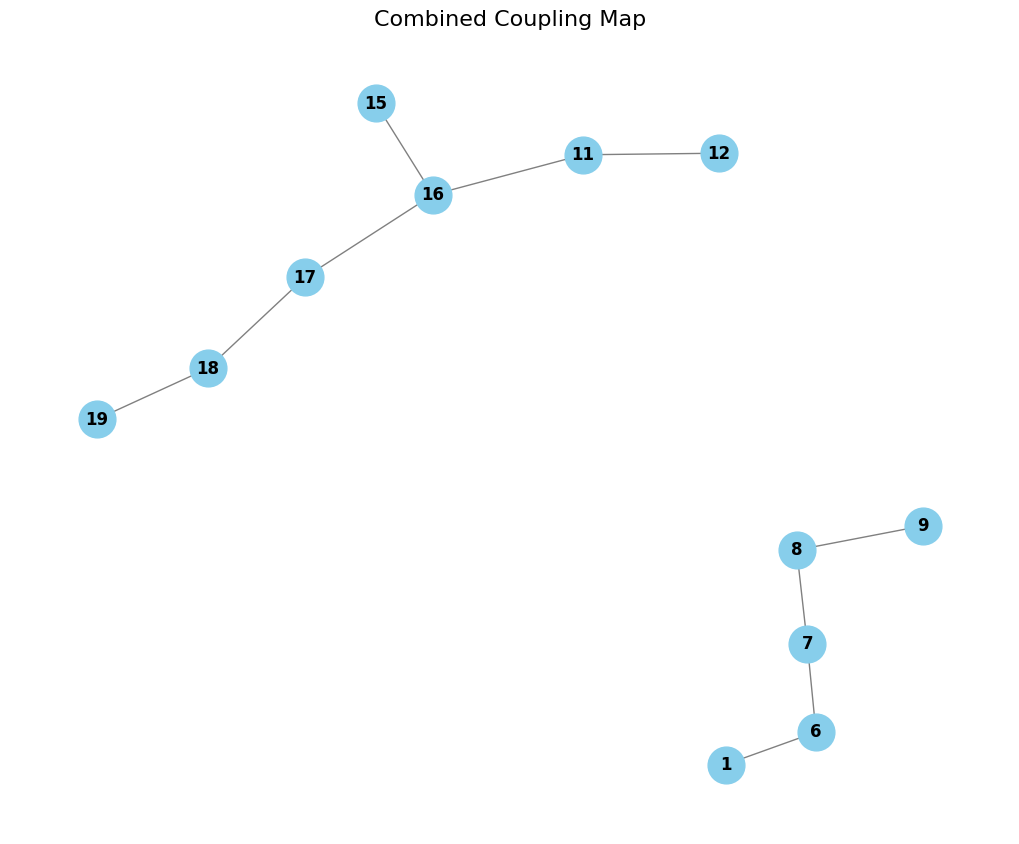

{(11, 16), (18, 19), (11, 12), (15, 16), (6, 7), (8, 9), (7, 8), (1, 6), (17, 18), (16, 17)}


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the derived coupling maps as lists of tuples (edges)
# Assuming derived_map_grover_l, derived_map_t_qft, derived_map_t_1bit, derived_map_1bit_adder are defined
# combined_coupling_map = derived_map_mod5 | derived_map_1bit_adder | derived_map_qft| derived_map_grover|derived_map_ghz|derived_map_one23 |derived_map_4mod7|derived_map_4gt4|derived_map_4gt11|derived_map_mod5mils|derived_map_4gt13|derived_map_4gt12
combined_coupling_map =filtered_edges_4mod7|filtered_edges_4gt4|filtered_edges_ghz#|filtered_edges_grover|filtered_edges_one23|filtered_edges_1bit#|filtered_edges_mod54|filtered_edges_qft|filtered_edges_4gt13#|filtered_edges_mod5mils|filtered_edges_4mod7|filtered_edges_4gt12#|filtered_edges_4gt11|filtered_edges_rc_s_3|filtered_edges_rc_s_2#|filtered_edges_rc_s|filtered_edges_rc_s_6|filtered_edges_rc_s_5#|filtered_edges_rc_s_4

#filtered_edges_qft_big|filtered_edges_ghz_big|filtered_edges_grover_big#|filtered_edges_ghz_big_2|filtered_edges_grover_big_2|filtered_edges_qft_big_2#|filtered_edges_qft_big_3|filtered_edges_grover_big_3|filtered_edges_ghz_big_3#|filtered_edges_ghz_big_4|filtered_edges_grover_big_4|filtered_edges_qft_big_4#|filtered_edges_qft_big_5|filtered_edges_grover_big_5|filtered_edges_ghz_big_5#|filtered_edges_qft_big_6|filtered_edges_grover_big_6|filtered_edges_ghz_big_6

#filtered_edges_rc_3|filtered_edges_rc|filtered_edges_rc_2#|filtered_edges_rc_6|filtered_edges_rc_5|filtered_edges_rc_4#|filtered_edges_rc_7|filtered_edges_rc_8|filtered_edges_rc_9#|filtered_edges_rc_12|filtered_edges_rc_10|filtered_edges_rc_11#|filtered_edges_rc_15|filtered_edges_rc_13|filtered_edges_rc_14#|filtered_edges_rc_16|filtered_edges_rc_18|filtered_edges_rc_17

#filtered_edges_qft_big|filtered_edges_ghz_big|filtered_edges_grover_big|filtered_edges_ghz_big_2|filtered_edges_grover_big_2|filtered_edges_qft_big_2|filtered_edges_qft_big_3|filtered_edges_grover_big_3|filtered_edges_ghz_big_3|filtered_edges_ghz_big_4|filtered_edges_grover_big_4|filtered_edges_qft_big_4|filtered_edges_qft_big_5|filtered_edges_grover_big_5|filtered_edges_ghz_big_5|filtered_edges_qft_big_6|filtered_edges_grover_big_6|filtered_edges_ghz_big_6
#filtered_edges_1bit|filtered_edges_mod54|filtered_edges_qft|filtered_edges_ghz|filtered_edges_grover|filtered_edges_one23|filtered_edges_4gt13|filtered_edges_mod5mils|filtered_edges_4gt4|filtered_edges_4mod7|filtered_edges_4gt12|filtered_edges_4gt11|filtered_edges_rc_s_3|filtered_edges_rc_s_2|filtered_edges_rc_s|filtered_edges_rc_s_6|filtered_edges_rc_s_5|filtered_edges_rc_s_4
# |filtered_edges_4gt11|filtered_edges_4gt12|filtered_edges_4gt13
# |derived_map_rc|derived_map_rc_3|derived_map_rc_2
# |derived_map_rc_17|derived_map_rc_18|derived_map_rc_16
# combined_coupling_map = derived_map_rc_5| derived_map_rc_4|derived_map_rc_6|derived_map_rc_7|derived_map_rc_8|derived_map_rc_9|derived_map_rc_11|derived_map_rc_10|derived_map_rc_12|derived_map_rc_13|derived_map_rc_14|derived_map_rc_15
G = nx.Graph()
G.add_edges_from(combined_coupling_map)

# Use a layout to minimize edge overlap
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust 'k' for spacing; increase it for more space

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=12, font_weight='bold')
plt.title('Combined Coupling Map', fontsize=16)
plt.axis('off')  # Turn off the axis for better visibility
plt.show()

# Print the combined coupling map
print(combined_coupling_map)


In [17]:
import numpy as np
from scipy.spatial.distance import hamming

def convert_to_graph(edge_set):
    graph = nx.Graph()
    graph.add_edges_from(edge_set)
    return graph

def normalize_graph(graph, n_qubits):
    # Extract all nodes (qubits) and create a mapping to the normalized range
    qubits = sorted(graph.nodes())
    qubit_mapping = {q: i for i, q in enumerate(qubits)}  # Map original qubits to [0, len(qubits)-1]
    
    # Create a normalized adjacency matrix
    matrix = np.zeros((n_qubits, n_qubits))
    
    for edge in graph.edges():
        # Map edges to the normalized qubit indices
        normalized_edge = (qubit_mapping[edge[0]], qubit_mapping[edge[1]])
        matrix[normalized_edge[0], normalized_edge[1]] = 1
        matrix[normalized_edge[1], normalized_edge[0]] = 1  # Assuming undirected graph
    return matrix

def hamming_distance_normalized(graph1, graph2, n_qubits):
    # Normalize both graphs
    adj_matrix1 = normalize_graph(graph1, n_qubits)
    adj_matrix2 = normalize_graph(graph2, n_qubits)
    
    # Flatten the matrices and compute Hamming distance
    flat1 = adj_matrix1.flatten()
    flat2 = adj_matrix2.flatten()
    return hamming(flat1, flat2) * len(flat1)
coupling_map = [
    # Horizontal connections (↔) on Row 1
    (0, 1), (1, 2), (2, 3), (3, 4),     (1, 6), (3, 8),     (5, 6), (6, 7), (7, 8), (8, 9),     (5, 10), (7, 12), (9,14) ,
    (10, 11), (11, 12), (12, 13), (13, 14), 
    (11, 16), (13, 18), 
    (15, 16), (16, 17), (17, 18), (18, 19) # Connection from Row 2 to Row 3 (column 9)
]

# Example usage
graph1 = convert_to_graph(coupling_map)
graph2 = convert_to_graph(combined_coupling_map)

n_qubits = 28
hamming_dist_20 = hamming_distance_normalized(graph1, graph2, n_qubits)
print(f"Hamming Distance between the two loop graphs for 20 qubits: {hamming_dist_20}")

# graph1_new = convert_to_graph(derived_map_grover_loop)
# graph2_new = convert_to_graph(loop_15)

# n_qubits = 15
# hamming_dist_15 = hamming_distance_normalized(graph1_new, graph2_new, n_qubits)
# print(f"Hamming Distance between the two loop graphs for 15 qubits: {hamming_dist_15}")


# Define the first coupling map
# Create graphs
G_a = nx.Graph()
G_a.add_edges_from(coupling_map)

G_b = nx.Graph()
G_b.add_edges_from(combined_coupling_map)

# Find missing edges from A in B
missing_from_a_to_b = [edge for edge in G_a.edges() if edge not in G_b.edges()]
missing_from_b_to_a = [edge for edge in G_b.edges() if edge not in G_a.edges()]

# Count of missing edges
count_missing_from_a_to_b = len(missing_from_a_to_b)
count_missing_from_b_to_a = len(missing_from_b_to_a)

# Output results
print(f"Number of connections in A missing from B: {count_missing_from_a_to_b}")
print(f"Number of connections in B missing from A: {count_missing_from_b_to_a}")




Hamming Distance between the two loop graphs for 20 qubits: 34.0
Number of connections in A missing from B: 13
Number of connections in B missing from A: 0


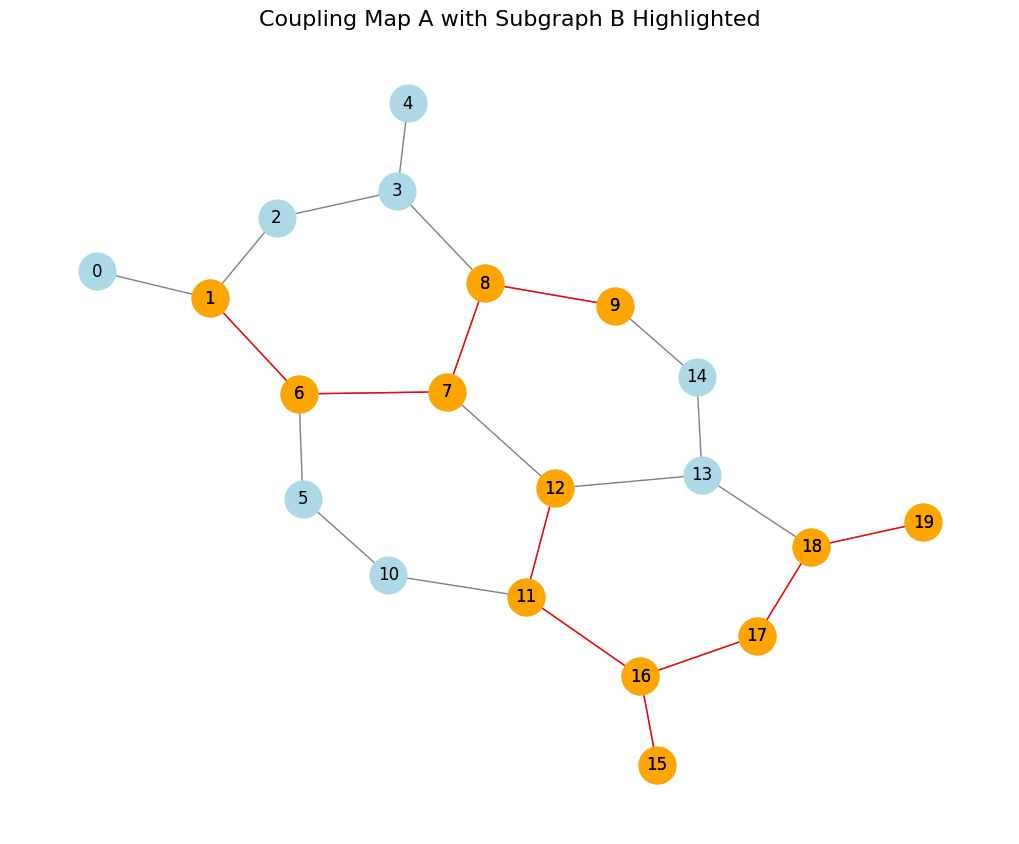

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Define two coupling maps as lists of tuples (edges)
# Replace these with your actual coupling maps

# Create graphs
G_a = nx.Graph()
G_a.add_edges_from(coupling_map)

G_b = nx.Graph()
G_b.add_edges_from(combined_coupling_map)

# Get positions for both graphs
pos_a = nx.spring_layout(G_a, seed=42)
pos_b = pos_a  # Use the same layout for consistency

plt.figure(figsize=(10, 8))

# Draw the larger graph (G_a)
nx.draw(G_a, pos_a, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', font_size=12)

# Draw the subgraph (G_b) with a different color
nx.draw(G_b, pos_b, with_labels=True, node_color='orange', node_size=700, edge_color='red', font_size=12)

# Title and display
plt.title('Coupling Map A with Subgraph B Highlighted', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
x_values = [3, 6, 9, 12, 15,18]  # x-axis points
y_values = [7/23,7/23, 14/23, 18/23, 21/23,21/23]  # y-axis points (percentages)
y_v=[10/23,20/23,20/23,20/23,21/23,21/23]
y=[17/23,21/23,22/23,22/23,22/23,23/23]
y_percentages = [value * 100 for value in y_values]
y_percentages_v = [value * 100 for value in y_v]
y_percentages_v2 = [value * 100 for value in y]

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_percentages,  linestyle='-', color='b', label='5 qubits')
plt.plot(x_values, y_percentages_v,  linestyle='-', color='r', label='10 qubits')
plt.plot(x_values, y_percentages_v2,  linestyle='-', color='g', label='15 qubits')

# Add labels and title
plt.xlabel('Number of circuits', fontsize=18)
plt.ylabel('Percentage of backend predicted(%)', fontsize=18)
plt.title('Number of circuits vs Prediction Percentage', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Show the plot

# Add grid

# Show the plot
plt.show()


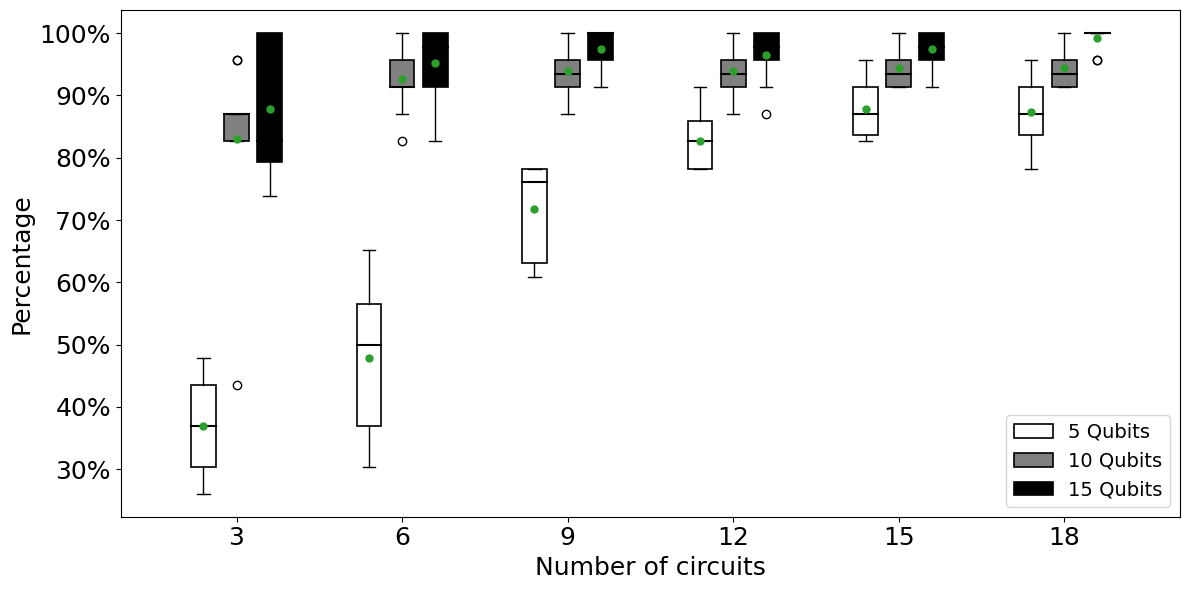

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data for circuits
circuits = [
    np.array([7/23,7/23,6/23,8/23,7/23, 10/23,9/23,11/23, 10/23,10/23])
,np.array([10/23,20/23,20/23,19/23,20/23,22/23,20/23,22/23,19/23, 19/23])
, np.array([17/23, 23/23, 23/23, 23/23, 18/23, 19/23,23/23, 18/23, 19/23, 19/23])
, np.array([7/23,7/23,8/23, 10/23, 10/23, 14/23, 13/23,15/23, 13/23,13/23])
, np.array([20/23,21/23,21/23,19/23, 21/23,23/23, 21/23,23/23,22/23,22/23])
, np.array([21/23, 23/23, 23/23, 23/23, 21/23, 21/23,23/23,23/23,22/23, 19/23])
, np.array([14/23, 14/23, 14/23, 18/23, 16/23,18/23, 17/23, 18/23, 18/23, 18/23])
, np.array([20/23,21/23,21/23,22/23,21/23,23/23,21/23,23/23,22/23,22/23])
, np.array([22/23, 23/23, 23/23, 23/23, 21/23, 21/23,23/23,23/23,22/23,23/23])
, np.array([18/23, 18/23, 18/23, 18/23,19/23, 21/23,20/23,20/23, 19/23, 19/23])
, np.array([20/23,21/23,21/23,22/23,21/23,23/23,21/23,23/23,22/23,22/23])
, np.array([22/23, 20/23, 23/23, 23/23, 22/23, 21/23,23/23,23/23,22/23,23/23])
, np.array([21/23, 19/23, 19/23, 19/23,20/23,22/23, 21/23, 21/23,20/23,20/23])
, np.array([21/23,21/23,21/23,22/23,21/23,23/23,21/23,23/23,22/23,22/23])
, np.array([22/23, 23/23, 23/23, 21/23, 23/23,22/23,22/23,23/23,23/23,22/23])
, np.array([21/23, 18/23,19/23,19/23,20/23,22/23, 21/23, 21/23,20/23,20/23])
, np.array([ 21/23,21/23,21/23,22/23,21/23,23/23,21/23,23/23,22/23,22/23])
, np.array([ 23/23, 23/23,22/23,22/23,23/23,23/23, 23/23, 23/23, 23/23, 23/23])

]

# Define positions for grouping boxplots under each x label
n_groups = len(circuits) // 3  # Number of x labels
x_labels = ['3', '6', '9', '12', '15', '18']
group_centers = np.arange(n_groups) + 1  # Center positions for x labels
offsets = [-0.2, 0, 0.2]  # Offsets for 5, 10, 15 qubits
positions = [center + offset for center in group_centers for offset in offsets]

# Create the boxplot
plt.figure(figsize=(12, 6))
box_plot = plt.boxplot(
    circuits,
    positions=positions,
    widths=0.15,
    patch_artist=True,
    showmeans=True,
)

# Customize boxplot appearance
colors = ['white', 'grey', 'black']
for i, box in enumerate(box_plot['boxes']):
    box.set_facecolor(colors[i % 3])
    box.set_edgecolor('black')
    box.set_linewidth(1.2)

# Customize medians and means
for median in box_plot['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)
for mean in box_plot['means']:
    mean.set_marker('o')
    mean.set_color('red')
    mean.set_markersize(5)

# Set x-axis and y-axis formatting
plt.xticks(group_centers, x_labels, fontsize=18)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
plt.yticks(fontsize=18)
plt.xlabel('Number of circuits', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
# plt.title('Box Plots of Circuit Performance', fontsize=16)

# Add legend
plt.legend(
    [box_plot['boxes'][0], box_plot['boxes'][1], box_plot['boxes'][2]],
    ['5 Qubits', '10 Qubits', '15 Qubits'],
    loc='lower right',
    fontsize=14,
)

# Show the plot
plt.tight_layout()
plt.show()
